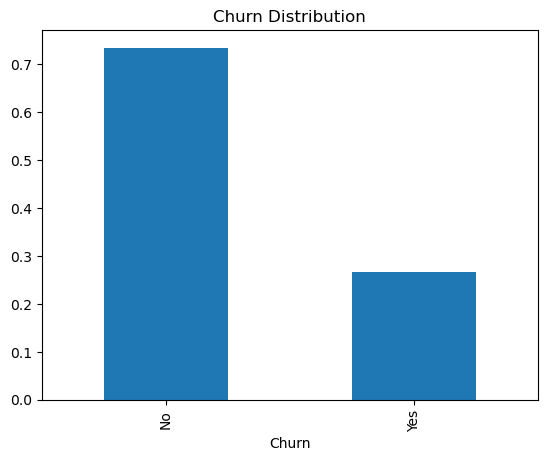

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Customer-Churn.CSV")

churn_rate = df['Churn'].value_counts(normalize=True)
churn_rate.plot(kind='bar')
plt.title("Churn Distribution")
plt.show()


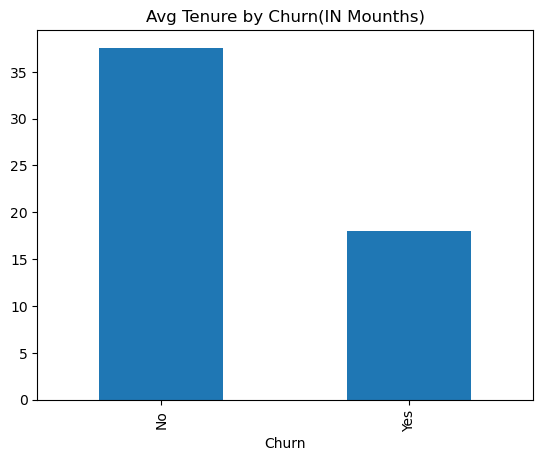

In [11]:
df.groupby("Churn")["tenure"].mean().plot(kind='bar')
plt.title("Avg Tenure by Churn(IN Mounths)")
plt.show()


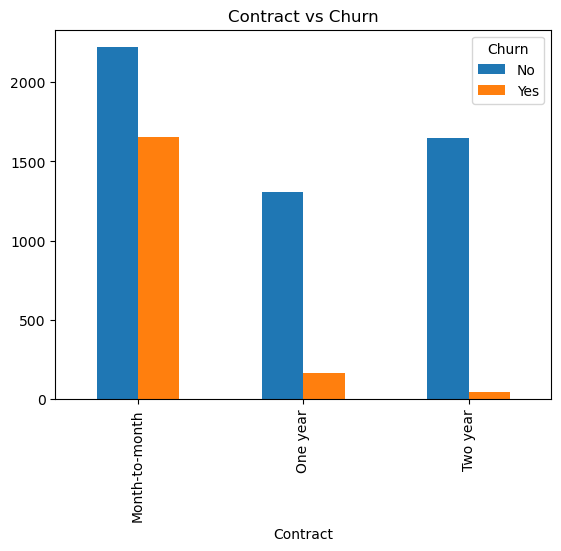

In [3]:
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar')
plt.title("Contract vs Churn")
plt.show()


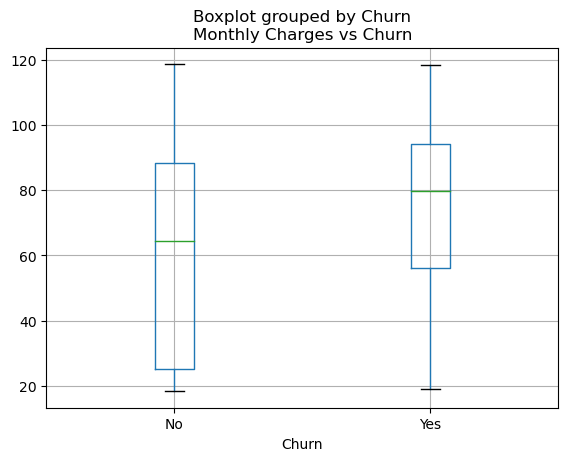

In [4]:
df.boxplot(column="MonthlyCharges", by="Churn")
plt.title("Monthly Charges vs Churn")
plt.show()


## Prediction Visualization 

In [5]:
import joblib
from src.preprocessing import preprocess

df = preprocess("Customer-Churn.CSV")

model = joblib.load("churn_model.pkl")

df['churn_prob'] = model.predict_proba(df.drop(columns=['churn']))[:,1]


c:\Users\mrpra\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\mrpra\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.7.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## High-risk customers

In [6]:
df.sort_values('churn_prob', ascending=False).head(10)


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,paperlessbilling,monthlycharges,totalcharges,churn,payment_credit_card_(automatic),payment_electronic_check,payment_mailed_check,service_fiber_optic,service_no,churn_prob
2208,0,1,1,0,1,1,1,0,0,1,...,1,100.80,100.80,1,False,True,False,True,False,0.910334
1704,1,0,0,1,1,1,1,0,0,1,...,1,99.75,99.75,1,False,True,False,True,False,0.908438
1976,1,1,0,0,1,1,1,0,0,0,...,1,93.55,93.55,1,False,True,False,True,False,0.908362
4800,1,1,0,0,1,1,1,0,0,0,...,1,94.00,94.00,1,False,True,False,True,False,0.908362
4585,0,1,0,0,1,1,1,0,0,0,...,1,85.05,85.05,1,False,True,False,True,False,0.907460
6488,0,0,0,0,1,1,0,0,0,0,...,1,69.50,69.50,1,False,True,False,True,False,0.906592
5872,0,0,0,1,1,1,0,0,0,0,...,1,69.65,69.65,1,False,True,False,True,False,0.905708
20,1,1,0,0,1,0,0,0,0,1,...,1,39.65,39.65,1,False,True,False,False,False,0.905399
4081,0,0,0,0,1,1,0,0,0,0,...,1,69.60,69.60,1,False,True,False,True,False,0.905043
3294,0,0,1,1,1,1,0,0,0,0,...,1,69.10,69.10,1,False,False,True,True,False,0.900427


## Who is likely to churn?

In [7]:
df[df['churn_prob'] > 0.7][['tenure','monthlycharges','contract','churn_prob']].head()


,tenure,monthlycharges,contract,churn_prob
5,8,99.65,0,0.844641
20,1,39.65,0,0.905399
31,2,95.50,0,0.781783
39,11,97.85,0,0.816841
47,2,80.65,0,0.735173


## Visualize churn risk

<Axes: >

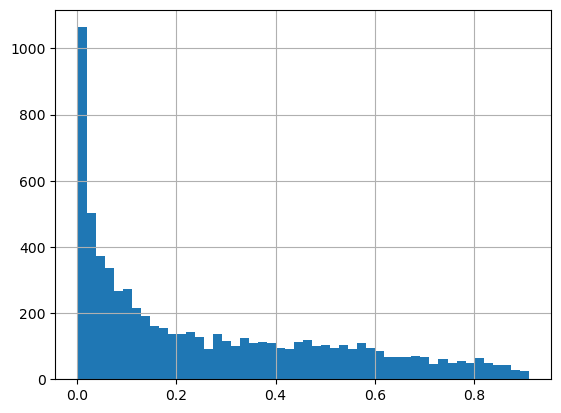

In [8]:
df['churn_prob'].hist(bins=50)
